# Petro Rabigh's Financial Analysis

This notebook performs a comprehensive financial analysis of Petro Rabigh Saudi company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Petro Rabigh raw data from the CSV file
petro_rabigh_raw_data = pd.read_csv('petro_rabigh_data.csv')

# Display the first few rows to understand the data structure
petro_rabigh_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Petro Rabigh,Petrochemicals,34061975,544151,439329,74029648,63988241
1,2020,Petro Rabigh,Petrochemicals,21870198,3781128,2435658,70694009,64490526
2,2021,Petro Rabigh,Petrochemicals,45638066,2036661,3192471,73362023,65056112
3,2022,Petro Rabigh,Petrochemicals,55952481,1114881,12228,65578732,50323871
4,2023,Petro Rabigh,Petrochemicals,44603993,4692733,2602953,63202879,52652198


In [3]:
# Get a summary of the dataset including data types and non-null counts
petro_rabigh_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Petro Rabigh’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
petro_rabigh_raw_data = petro_rabigh_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
petro_rabigh_raw_data[numeric_cols] = petro_rabigh_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
petro_rabigh_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Petro Rabigh,Petrochemicals,34061975.0,544151.0,439329.0,74029648.0,63988241.0
1,2020,Petro Rabigh,Petrochemicals,21870198.0,3781128.0,2435658.0,70694009.0,64490526.0
2,2021,Petro Rabigh,Petrochemicals,45638066.0,2036661.0,3192471.0,73362023.0,65056112.0
3,2022,Petro Rabigh,Petrochemicals,55952481.0,1114881.0,12228.0,65578732.0,50323871.0
4,2023,Petro Rabigh,Petrochemicals,44603993.0,4692733.0,2602953.0,63202879.0,52652198.0
5,2024,Petro Rabigh,Petrochemicals,39349068.0,4544527.0,2571190.0,60236567.0,50433267.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
petro_rabigh_new_data = petro_rabigh_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
petro_rabigh_new_data['Revenue_Growth_%'] = petro_rabigh_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(petro_rabigh_new_data['Revenue_SAR'].iloc[0], petro_rabigh_new_data['Revenue_SAR'].iloc[-1], len(petro_rabigh_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 2.93%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
petro_rabigh_new_data['Operating_Margin_%'] = (petro_rabigh_new_data['Operating_Income_SAR'] / petro_rabigh_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
petro_rabigh_new_data['Net_Profit_Margin_%'] = (petro_rabigh_new_data['Net_Income_SAR'] / petro_rabigh_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(petro_rabigh_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019            1.289793             1.597532
1  2020           11.136881            17.288952
2  2021            6.995193             4.462637
3  2022            0.021854             1.992550
4  2023            5.835695            10.520881
5  2024            6.534310            11.549262


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
petro_rabigh_new_data['Liabilities_to_Assets_Ratio'] = (petro_rabigh_new_data['Total_Liabilities_SAR'] / petro_rabigh_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
petro_rabigh_new_data['Asset_Turnover_Ratio'] = petro_rabigh_new_data['Revenue_SAR'] / petro_rabigh_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(petro_rabigh_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    86.435965              0.460113
1  2020                    91.224882              0.309364
2  2021                    88.678187              0.622094
3  2022                    76.738097              0.853211
4  2023                    83.306645              0.705727
5  2024                    83.725334              0.653242


## Visualizations

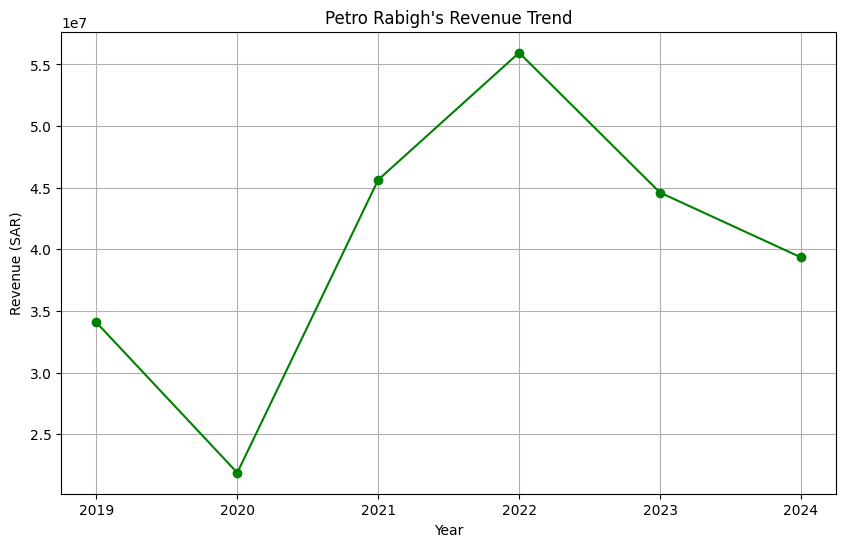

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(petro_rabigh_new_data["Year"], petro_rabigh_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Petro Rabigh's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

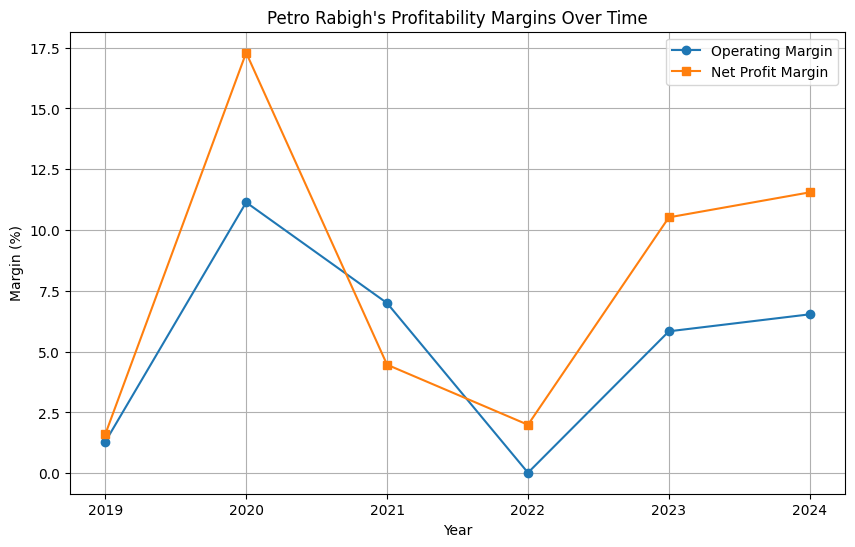

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(petro_rabigh_new_data["Year"], petro_rabigh_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(petro_rabigh_new_data["Year"], petro_rabigh_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Petro Rabigh's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
petro_rabigh_new_data.to_csv('petro_rabigh_analysis_results.csv', index=False)
print("Analysis results saved to 'petro_rabigh_analysis_results.csv'")

Analysis results saved to 'petro_rabigh_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Petro Rabigh's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.